<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500,>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Домашнее задание: соревнование на Kaggle по распознаванию одежды</b></h2>

---

Всем привет!  

Надеемся, что вам показались интересными и понятными лекция и семинар по многослйным нейросетям и PyTorch. Если же Вы ещё не успели ими насладиться -- просьба посмотреть видео на нашем канале и просмотреть ноутбуки с семинара, в этом ноутбуке эти знания будут использоваться на практике.

<h2 style="text-align: center;"><b>FashionMNIST</b></h2>

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

Выше изображены примеры того, с чем мы будем работать -- чёрно-белые изображения одежды. Слева более классический датасет -- MNIST, он же датасет рукописных цифр. Мы решили, что вам будет интереснее всё же рнаучить машину распознавать одежду (спойлер: с рукописными цифрами такой подход это тоже будут работать ;)

<h3 style="text-align: center;"><b>Ссылка на соревнование: https://www.kaggle.com/c/dlschool-fashionmnist3. Вам нужно скачать оттуда всё из раздела `Data`, далее мы будем работать с этим - обучаться на train и предсказывать на test.</b></h3> 

<h4 style="text-align: center;"><b>Оргиниальный датасет: https://www.kaggle.com/zalando-research/fashionmnist</b></h4> 

После скачивания (скачанный архив распакуйте в одну папку с этим ноутбуком) и регистрации на Kaggle Вам нужно вступить в соревнование (по ссылке выше) и прочитать его описание.

<h3 style="text-align: center;"><b>Пожалуйста, укажите в соревновании свой ник == вашему нику на Canvas, иначе мы не сможем потом поставить вам баллы</b></h3>

Платформа **Kaggle** -- основная платформа для соревнований в Data Science, так что привыкайте ;)

<h2 style="text-align: center;"><b>Данные</b></h2>

Мы будем работать с картинками одежды (чёрно-белыми, то есть цветовых каналов не 3, а 1). По входной картинке нужно предсказать тип одежды. Давайте посмотрим на то, что за датасет мы скачали:

In [44]:
import pandas as pd

In [45]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [46]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

In [47]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Выведем начало таблиц:

In [48]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
test_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Выведем размеры обучающей и тестовой выборок:

In [7]:
train_df.shape

(60000, 785)

In [8]:
test_df.shape

(10000, 784)

Что значат эти размеры и числа внутри DataFrame'ов? Всё просто -- **каждая строчка соответствует одной картинке**, а **столбцы -- это значения в пикселях этой кратинки**. **Первый столбец в train_df говорит о типе (классе) одежды (от 0 до 9)**.  

Однако перед тем, как двигаться дальше, краткая информация о представлении изображений в компьютере:

<h2 style="text-align: center;"><b>Изображения</b></h2>

<p align=center><img src="https://openclipart.org/image/2400px/svg_to_png/136057/1304647802.png" width=300 height=300></p>

Как и вся информация, изображения представляются в компьютере числами. Стандартное цветовое пространство, с помощью которого декодируют и отрисовывают изображение -- это RGB (Red, Green и Blue). Каждая комбинация трёх чисел от 0 до 255 задаёт какой-то цвет. Например, (255,255,255) задаёт белый цвет, (255,0,0) -- красный. Также происходит и при загрузке картинок в Python, давайте посмотрим напрмиере:

* Загрузим произвольную цветную картинку с помощью matplotlib:

In [50]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
image_png = plt.imread('./fpmi_logo.png')

In [52]:
image_png

array([[[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]],

       [[0.89411765, 0.92156863, 0.92156863, 0.14901961],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.89411765, 0.92156863, 0.92156863, 0.14901961]],

       [[0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.      

* Посмотрим на тип загруженного объекта:

In [53]:
type(image_png)

numpy.ndarray

Интересно, картинка стала `numpy.array`. А какая его форма и что внутри?

In [54]:
image_png.shape

(716, 2232, 4)

In [55]:
image_png[0].shape

(2232, 4)

In [56]:
image_png[0]

array([[0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.        , 0.        , 0.        , 0.        ],
       ...,
       [0.        , 0.        , 0.        , 0.        ],
       [0.89411765, 0.92156863, 0.92156863, 0.14901961],
       [0.9098039 , 0.9254902 , 0.94509804, 0.5686275 ]], dtype=float32)

In [16]:
image_png.dtype

dtype('float32')

То есть это какая матрица, а точнее тензор (потому что есть третья размерность), у которого 573 строки, 1579 столбцов и 4 канала. Можно представлять это себе как 4 наложенных друг на друга матрицы, каждая из которых отвечает за один цвет -- R, G и B.  Внутри всех этих матриц лежат числа типа float32, то есть вещественные. Тут стоит сказать, что это просто тонкости загрузки в matplotlib -- на самом деле это матрицы из целых числе от 0 до 255 (включительно).

Стоп, но ведь каналов 4, а не 3? Да, четвёртый канал в данном случае -- это альфа-канал, у .png картинок он обычно присутствует. Давайте попробуем загрузить .jpg картинку:

In [17]:
image_jpg = plt.imread('./dlschool_logo.jpg')

In [18]:
image_jpg.shape

(400, 400, 3)

Отлично, теперь 3 канала и нам совсем не страшно -- это три матрицы 400 на 400, каждая из которых отвечает за один цвет. Давайте отрисуем две загруженные картинки с помощью matplotlib:

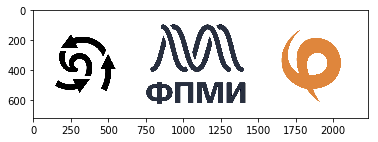

In [19]:
plt.imshow(image_png);

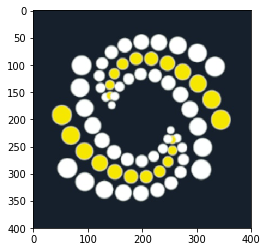

In [20]:
plt.imshow(image_jpg);

В данном случае **пиксель** -- это кортеж (упорядоченная последовательность чисел), состоящий из трёх чисел (как в примере раньше, например, (255,0,0) -- полностью красный пиксель). 

Итак, картинки -- это матрицы, состоящие из чисел, которые характеризуют насышенность данного пикселя определённым цветом цветом.  

Аналогично и с **чёрно-белыми изображениями** -- это просто матрица с одним каналом (то есть пксель -- это просто число), например, 28 на 28, каждое число которой от 0 до 255 характеризует яркость пикселя (насыщенность белым). 
Например, 255 -- это полностью белый пиксель, 0 -- полностью чёрный. Пора посмотреть, с чем мы будем работать в соревновании.

<h2 style="text-align: center;"><b>Данные (2)</b></h2>

Вернёмся к данным:

In [21]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [22]:
test_df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,44,105,44,10,0,...,105,64,30,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,174,136,155,31,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


Самый первый столбец -- **label**. Подробнее:

каждая картинка иметт класс от 0 до 9, расшифровка меток класса:  

|class_id|class_name|
|----|----|
|0| T-shirt/top|
|1| Trouser|
|2| Pullover|
|3| Dress|
|4| Coat|
|5| Sandal|
|6| Shirt|
|7| Sneaker|
|8| Bag|
|9| Ankle boot| 

In [23]:
train_df.values[0]

array([  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,
         0,   0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235,
       222, 255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180,
       207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 21

Видно, что это картинка типа Pullover (класс 2).

**Примечание:** у тестового датасета нужно удалить столбец label (по понятным причинам) -- вам нужно будет его предсказать и отправить эти предсказания в Kaggle.

Итак, мы имеем 60000 картинок, у каждой известна метка класса (то есть что это за одежда).  
Отделим `X` (признаковое описание объектов) и `y` (метки классов):

In [57]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [58]:
print(X_train.shape, y_train.shape)

(60000, 784) (60000,)


In [59]:
print(X_test.shape)

(10000, 784)


Но почему пиксели так странно представлены? На самом деле 784 пикселя -- это 28 * 28, то есть это "развёрнутая в строку" чёрно-белая картинка 28 на 28 пикселей.

Давайте убедимся в этом, отрисовав несколько (можете менять индекс и смотрть на отрисовку):

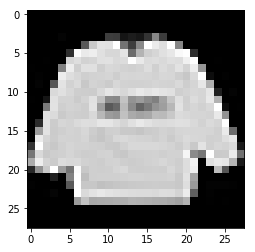

In [60]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray');

Не слишком похоже на пулловер, правда? :)  
    
Просто если мы будем использовать изображения большего разрешения, нам понадобятся бОльшие вычислительные мощности, поэтому пока что будем довольствоваться такими размерами.

Отлично, мы убедились в том, что имеем 60k картинок с метками для обучения, картинки "развёрнуты" в строку. Зачем разворачивать в строку? Потому что каждый пиксель в данном случае -- это один признак, то есть всего 784 признака, и уже их мы будем взвешивать нашей нейросетью, то есть у одного нейрона на входном слое будет 784 веса (+ Bias,  то есть 785 весов), на каждый пиксель по весу, и дальше уже будут второй слой, третий слой и так далее..

Время тренировать нейросети!

<h2 style="text-align: center;"><b>Нейросеть на PyTorch</b></h2>

Надеемся, что вы уже прорешали семинар, там довольно подробно всё описано. На всякий случай ещё раз напомним, из чего состоит процесс обучения нейросети:

- непосредственно, сама **архитектура** нейросети (сюда входят, например, типы функций активации у каждого нейрона);
- начальная **инициализация** весов каждого слоя;
- метод **оптимизации** нейросети (сюда ещё входит метод изменения `learning_rate`);
- размер **батчей** (`batch_size`);
- количество **итераций обучения** (`num_epochs`);
- **функция потерь** (`loss`);  
- тип **регуляризации** нейросети (для каждого слоя можно свой);  

То, что связано с ***данными и задачей***:  
- само **качество** выборки (непротиворечивость, чистота, корректность постановки задачи);  
- **размер** выборки;  

In [61]:
import matplotlib.pyplot as plt
import numpy as np

import torch

Проверим версию PyTorch:

In [62]:
torch.__version__

'1.0.1'

Сначала обернём данные в тензоры пайторча (может занять некоторое время):

In [63]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

Проверим:

In [64]:
print(X_train_tensor.shape, y_train_tensor.shape)

torch.Size([60000, 784]) torch.Size([60000])


In [65]:
y_train_tensor.unique()

tensor([2, 9, 6, 8, 0, 3, 4, 5, 7, 1])

На лекции обсуждалось, что нельзя просто запихнуть в LogLoss (основная функция потерь для задачи классификации, [как мы помним](https://drive.google.com/open?id=15wdyreZufKDxNQ55v4cl4Em2rtj7Q45B)) метки классов, предлагаем вам самим ещё раз подумать, почему. На всякий случай -- [ноутбук с более подробной информацией о функциях потерь](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W).

Так вот, нам надо преобразовать метки классов из целых чисел в OneHot-кодированные метки (если вам не знакомо это слово, [посмотрите первую половину этого видео](https://www.youtube.com/watch?v=ufkDhrngcr0)):

In [66]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

print(y_train_tensor)
print(y_onehot)

tensor([2, 9, 6,  ..., 8, 8, 7])
tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])


Видим, что наши метки перешли в вид "единица там, где номер класса, а остальные нули".

Напишем код, очень похожий на код с семинара: возьмём два слоя -- входной и один скрытый (выходной обычно не считают, но он тоже есть):

In [158]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 100, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

Обратите внимание:  

`D_in` -- это входная размерность (784 признака -- пикселя)  
`D_out` -- выходная размерность (10 классов -- типов одежды), то есть 10 нейронов на выходном слое  
`H` -- количество нейронов в скрытом слое  

Осталось выбрать Loss (функцию потерь) и метод оптимизации, с помощью которого мы будем считать градиенты и обновлять с помощью них обновлять веса.  

Loss мы выберем CrossEntropy, то есть кросс-энтропию, этот лосс почти всегда используется в задаче многоклассовой классификации (см. лекцию и ноутбук [loss_functions.ipynb](https://drive.google.com/open?id=1j6WpzeJQV1kS1Os4VJ0Avf68OkXVBo6W), там всё подробно объясняется), а метод оптимизации выберем обычный SGD (Stochastic Gradient Descent, стохастический градиентный спуск, см. лекцию про нейрон).

---

Однако перед тем, как перейти к коду обучения нейросети, есть одна тонкость -- **батчи**, а точнее **мини-батчи**.

**Мини-батчи** -- это небольшие (обычно размера 16, 32 или 64) "куски" выборки, то есть мини-батч размера 64 -- это 64 объекта из датасета. Обычно мини-батч называют просто батч (batch).

Так вот: методы оптимиазции по типу стохастического градиентного спуска часто считаются не под одному объекту (в этом случае оптимизация будет очень нестабильная, "шумная"), а по нескольким -- по батчу. То есть в обычном градиентном спуске будет сумма по всей выборке, в стохастическом (чистом варианте) -- по одному объекту, а "между ними" -- мини-батч SGD, то есть подсчёт градиентов на небольшом кусочке данных.

Одна **итерация (iteration)** алгоритма оптимизации -- это проход по одному батчу.
Одна **эпоха (epoch)** алгоритма оптимизации -- это проход по всей выборке. 

То есть, например, если выборка размера 60000, а батч размера 64, то одна эпоха занимает 60000 / 64 = 937,5 = 938 итераций.

---

Напишем функцию, генерирующую батчи:

In [159]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

Код обучения нейросети (обязателньо убедитесь, что понимаете, что делает каждая строчка -- это необходимо для ваших дальнейших экспериментов):

In [160]:
BATCH_SIZE = 64
NUM_EPOCHS = 100

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

[0, 100] current loss: 141.3221569824219
[0, 200] current loss: 139.21470352172852
[0, 300] current loss: 139.45038131713866
[0, 400] current loss: 138.83791961669922
[0, 500] current loss: 139.51711059570312
[0, 600] current loss: 138.325076751709
[0, 700] current loss: 139.29534896850586
[0, 800] current loss: 139.21013580322267
[0, 900] current loss: 138.9920491027832
[1, 100] current loss: 133.9131029510498
[1, 200] current loss: 133.8380867767334
[1, 300] current loss: 133.9426399230957
[1, 400] current loss: 133.7198836517334
[1, 500] current loss: 134.28002677917482
[1, 600] current loss: 133.0942819213867
[1, 700] current loss: 133.67090187072753
[1, 800] current loss: 133.89463066101075
[1, 900] current loss: 133.63553260803224
[2, 100] current loss: 133.2530544281006
[2, 200] current loss: 133.17773559570313
[2, 300] current loss: 133.58695877075195
[2, 400] current loss: 133.7717372894287
[2, 500] current loss: 133.67063385009766
[2, 600] current loss: 132.69846488952638
[2,

[21, 600] current loss: 114.99360427856445
[21, 700] current loss: 114.99388809204102
[21, 800] current loss: 115.71456527709961
[21, 900] current loss: 115.13783180236817
[22, 100] current loss: 115.0345824432373
[22, 200] current loss: 114.20697364807128
[22, 300] current loss: 115.49332389831542
[22, 400] current loss: 114.28409942626953
[22, 500] current loss: 115.55053688049317
[22, 600] current loss: 114.85822166442871
[22, 700] current loss: 115.11430557250976
[22, 800] current loss: 115.65729141235352
[22, 900] current loss: 115.30603004455567
[23, 100] current loss: 115.05937400817871
[23, 200] current loss: 114.27706237792968
[23, 300] current loss: 115.31729835510254
[23, 400] current loss: 114.14065254211425
[23, 500] current loss: 115.75127922058105
[23, 600] current loss: 114.82518203735351
[23, 700] current loss: 114.72946098327637
[23, 800] current loss: 115.38873580932618
[23, 900] current loss: 115.25272430419922
[24, 100] current loss: 114.95603622436523
[24, 200] cu

[42, 900] current loss: 111.45307739257812
[43, 100] current loss: 110.23648963928223
[43, 200] current loss: 109.97005767822266
[43, 300] current loss: 110.50711570739746
[43, 400] current loss: 110.24077964782715
[43, 500] current loss: 111.34295722961426
[43, 600] current loss: 110.87664131164551
[43, 700] current loss: 110.95549690246582
[43, 800] current loss: 111.03446907043457
[43, 900] current loss: 111.13761054992676
[44, 100] current loss: 110.05439659118652
[44, 200] current loss: 110.13832229614258
[44, 300] current loss: 110.84312088012695
[44, 400] current loss: 110.30743110656738
[44, 500] current loss: 111.36523796081543
[44, 600] current loss: 110.71109809875489
[44, 700] current loss: 110.67030311584473
[44, 800] current loss: 110.93024406433105
[44, 900] current loss: 110.92495399475098
[45, 100] current loss: 110.2760546875
[45, 200] current loss: 109.82085868835449
[45, 300] current loss: 110.58812454223633
[45, 400] current loss: 109.62781509399414
[45, 500] curre

[64, 300] current loss: 105.85962356567383
[64, 400] current loss: 106.59410690307617
[64, 500] current loss: 105.8929362487793
[64, 600] current loss: 106.81533584594726
[64, 700] current loss: 105.46886184692383
[64, 800] current loss: 105.93708587646485
[64, 900] current loss: 105.98962799072265
[65, 100] current loss: 105.98971855163575
[65, 200] current loss: 105.83373710632324
[65, 300] current loss: 106.11014137268066
[65, 400] current loss: 105.33563438415527
[65, 500] current loss: 105.95883094787598
[65, 600] current loss: 106.22181915283203
[65, 700] current loss: 106.17227027893067
[65, 800] current loss: 106.01252532958985
[65, 900] current loss: 106.05854225158691
[66, 100] current loss: 105.59771255493165
[66, 200] current loss: 105.50038551330566
[66, 300] current loss: 105.66465744018555
[66, 400] current loss: 104.71615257263184
[66, 500] current loss: 106.04906852722168
[66, 600] current loss: 106.27321815490723
[66, 700] current loss: 105.61184036254883
[66, 800] cu

[85, 600] current loss: 106.13472785949708
[85, 700] current loss: 106.09124053955078
[85, 800] current loss: 105.70738410949707
[85, 900] current loss: 105.22718170166016
[86, 100] current loss: 105.36619636535644
[86, 200] current loss: 105.65994895935059
[86, 300] current loss: 105.24792488098144
[86, 400] current loss: 104.6904776763916
[86, 500] current loss: 105.62091201782226
[86, 600] current loss: 105.99357627868652
[86, 700] current loss: 105.36361381530762
[86, 800] current loss: 105.92810562133789
[86, 900] current loss: 105.49952819824219
[87, 100] current loss: 104.98788848876953
[87, 200] current loss: 105.39057838439942
[87, 300] current loss: 105.85576805114746
[87, 400] current loss: 105.25098617553711
[87, 500] current loss: 105.98371124267578
[87, 600] current loss: 105.6439697265625
[87, 700] current loss: 105.8638087463379
[87, 800] current loss: 105.40886627197266
[87, 900] current loss: 105.14122535705566
[88, 100] current loss: 104.99098808288574
[88, 200] curr

Отлично, мы получили обученную нейросеть. Давайте измерим качество на обучающей выбоорке:

In [161]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 83 %
Accuracy of Trouser : 97 %
Accuracy of Pullover : 83 %
Accuracy of Dress : 95 %
Accuracy of  Coat :  0 %
Accuracy of Sandal : 98 %
Accuracy of Shirt : 72 %
Accuracy of Sneaker : 96 %
Accuracy of   Bag : 97 %
Accuracy of Ankle boot : 97 %


Уже сейчас видно, что сеть далеко не идеально -- она предсказывает только 7 классов, а про некоторые просто "забывает".

Теперь предскажем на тестовой и сохраним предсказания в файл. Это ни что иное, как baseline, который вам надо побить, чтобы получить хоть какие-то ненулевые баллы за это ДЗ.

In [162]:
y_test_pred = net(torch.FloatTensor(X_test))

In [163]:
y_test_pred.shape

torch.Size([10000, 10])

In [164]:
y_test_pred[:5]

tensor([[3.3442e-07, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 2.8856e-27, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.8311e-18, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]],
       grad_fn=<SliceBackward>)

Преобразуем OneHot'ы в числовые метки:

In [165]:
_, predicted = torch.max(y_test_pred, 1)

predicted

tensor([6, 1, 2,  ..., 8, 8, 1])

Сохраним в датафрейм:

In [166]:
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

,Category
0,6
1,1
2,2
3,0
4,3


In [167]:
answer_df['Id'] = answer_df.index

In [168]:
answer_df.head()

,Category,Id
0,6,0
1,1,1
2,2,2
3,0,3
4,3,4


In [169]:
answer_df.tail()

,Category,Id
9995,0,9995
9996,6,9996
9997,8,9997
9998,8,9998
9999,1,9999


Отлично, созраним в файл и отправим:

In [84]:
answer_df.to_csv('./baseline.csv', index=False)

В точности этот файл и есть **baseline.csv**, который вы видите на лидерборде и который вам нужно побить.

<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

In [67]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

In [68]:
length = y_train_tensor.shape[0]
num_classes = 10  # количество классов, в нашем случае 10 типов одежды

# закодированные OneHot-ом метки классов
y_onehot = torch.FloatTensor(length, num_classes)

y_onehot.zero_()
y_onehot.scatter_(1, y_train_tensor.view(-1, 1), 1)

tensor([[0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

In [69]:
# N - размер батча (batch_size, нужно для метода оптимизации)
# D_in - размерность входа (количество признаков у объекта)
# H - размерность скрытых слоёв; 
# D_out - размерность выходного слоя (суть - количество классов)
D_in, H, D_out = 784, 350, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.Softmax()
)

In [70]:
BATCH_SIZE = 64
NUM_EPOCHS = 200

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        # forward (подсчёт ответа с текущими весами)
        y_pred = net(X_batch)

        # вычисляем loss'ы
        loss = loss_fn(y_pred, y_batch)
        
        running_loss += loss.item()
        
        # выводем качество каждые 2000 батчей
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        # зануляем градиенты
        optimizer.zero_grad()

        # backward (подсчёт новых градиентов)
        loss.backward()

        # обновляем веса
        optimizer.step()
        
        iter_num += 1

[0, 100] current loss: 130.00231727600098
[0, 200] current loss: 122.66972412109375
[0, 300] current loss: 120.43441390991211
[0, 400] current loss: 120.8479296875
[0, 500] current loss: 120.2440950012207
[0, 600] current loss: 120.79697692871093
[0, 700] current loss: 119.77451522827148
[0, 800] current loss: 119.51992568969726
[0, 900] current loss: 119.8128311920166
[1, 100] current loss: 118.78305290222168
[1, 200] current loss: 119.56566093444825
[1, 300] current loss: 118.62800926208496
[1, 400] current loss: 118.74566047668458
[1, 500] current loss: 118.75927642822266
[1, 600] current loss: 119.75834915161133
[1, 700] current loss: 118.74462181091309
[1, 800] current loss: 118.50434768676757
[1, 900] current loss: 113.6427377319336
[2, 100] current loss: 112.7558901977539
[2, 200] current loss: 113.2817733001709
[2, 300] current loss: 112.25403060913087
[2, 400] current loss: 112.50001480102539
[2, 500] current loss: 112.53789810180665
[2, 600] current loss: 113.41327072143555
[

[21, 600] current loss: 110.36715255737305
[21, 700] current loss: 109.42024673461914
[21, 800] current loss: 109.82694267272949
[21, 900] current loss: 109.32430183410645
[22, 100] current loss: 109.42378875732422
[22, 200] current loss: 109.73447319030761
[22, 300] current loss: 109.12561782836914
[22, 400] current loss: 109.3455835723877
[22, 500] current loss: 109.59983879089356
[22, 600] current loss: 110.38884658813477
[22, 700] current loss: 109.40820442199707
[22, 800] current loss: 109.7376245880127
[22, 900] current loss: 109.49388549804688
[23, 100] current loss: 109.24438346862793
[23, 200] current loss: 109.51008125305175
[23, 300] current loss: 108.86948425292968
[23, 400] current loss: 109.29693336486817
[23, 500] current loss: 109.51826263427735
[23, 600] current loss: 110.34017311096191
[23, 700] current loss: 109.33756027221679
[23, 800] current loss: 109.72202407836915
[23, 900] current loss: 109.36758041381836
[24, 100] current loss: 109.1877084350586
[24, 200] curr

[42, 900] current loss: 108.41535636901855
[43, 100] current loss: 108.43430015563965
[43, 200] current loss: 108.92784744262696
[43, 300] current loss: 108.15952766418457
[43, 400] current loss: 108.3804759979248
[43, 500] current loss: 108.6492691040039
[43, 600] current loss: 109.53337890625
[43, 700] current loss: 108.66519515991212
[43, 800] current loss: 109.04144676208496
[43, 900] current loss: 108.44393409729004
[44, 100] current loss: 108.33147148132325
[44, 200] current loss: 108.83455421447754
[44, 300] current loss: 108.18877166748047
[44, 400] current loss: 108.51779014587402
[44, 500] current loss: 108.77792755126953
[44, 600] current loss: 109.42109191894531
[44, 700] current loss: 108.54871170043945
[44, 800] current loss: 108.90606063842773
[44, 900] current loss: 108.45737564086915
[45, 100] current loss: 108.31293014526368
[45, 200] current loss: 108.96443649291992
[45, 300] current loss: 108.07931625366211
[45, 400] current loss: 108.41518371582032
[45, 500] curren

[64, 300] current loss: 107.71787017822265
[64, 400] current loss: 107.74977767944335
[64, 500] current loss: 108.06395179748534
[64, 600] current loss: 108.94812515258789
[64, 700] current loss: 108.3012020111084
[64, 800] current loss: 108.46698974609374
[64, 900] current loss: 108.00642135620117
[65, 100] current loss: 107.90403297424317
[65, 200] current loss: 108.40355728149414
[65, 300] current loss: 107.63130531311035
[65, 400] current loss: 107.72705207824707
[65, 500] current loss: 108.1122817993164
[65, 600] current loss: 108.85393783569336
[65, 700] current loss: 108.21332069396972
[65, 800] current loss: 108.41317634582519
[65, 900] current loss: 108.14336997985839
[66, 100] current loss: 107.92243438720703
[66, 200] current loss: 108.37407371520996
[66, 300] current loss: 107.58546691894531
[66, 400] current loss: 107.8419612121582
[66, 500] current loss: 108.2111563873291
[66, 600] current loss: 108.82964103698731
[66, 700] current loss: 108.32043144226074
[66, 800] curre

[85, 600] current loss: 102.83650016784668
[85, 700] current loss: 102.67162200927734
[85, 800] current loss: 102.66198043823242
[85, 900] current loss: 102.13416038513184
[86, 100] current loss: 102.16654151916504
[86, 200] current loss: 102.31295402526855
[86, 300] current loss: 102.12886505126953
[86, 400] current loss: 101.79484550476074
[86, 500] current loss: 102.28152854919433
[86, 600] current loss: 102.62978996276856
[86, 700] current loss: 102.43773330688477
[86, 800] current loss: 102.63435585021972
[86, 900] current loss: 102.3019302368164
[87, 100] current loss: 101.92480201721192
[87, 200] current loss: 102.18148643493652
[87, 300] current loss: 102.06473808288574
[87, 400] current loss: 101.78729049682617
[87, 500] current loss: 102.26009895324707
[87, 600] current loss: 102.5864153289795
[87, 700] current loss: 102.45999839782715
[87, 800] current loss: 102.50368942260742
[87, 900] current loss: 102.11227722167969
[88, 100] current loss: 102.03375778198242
[88, 200] cur

[106, 800] current loss: 98.63518844604492
[106, 900] current loss: 98.64769844055176
[107, 100] current loss: 98.04788391113281
[107, 200] current loss: 98.43354675292969
[107, 300] current loss: 98.42839988708496
[107, 400] current loss: 98.18664833068847
[107, 500] current loss: 98.2137205505371
[107, 600] current loss: 98.28902297973633
[107, 700] current loss: 98.2012516784668
[107, 800] current loss: 98.44676216125488
[107, 900] current loss: 98.50199020385742
[108, 100] current loss: 97.86386581420898
[108, 200] current loss: 98.33998817443847
[108, 300] current loss: 98.31197784423829
[108, 400] current loss: 97.93222618103027
[108, 500] current loss: 97.87231803894043
[108, 600] current loss: 98.26348007202148
[108, 700] current loss: 98.33192665100097
[108, 800] current loss: 98.46025993347168
[108, 900] current loss: 98.29740898132324
[109, 100] current loss: 97.82424522399903
[109, 200] current loss: 98.25774482727051
[109, 300] current loss: 97.94923690795899
[109, 400] cu

[128, 200] current loss: 97.32413551330566
[128, 300] current loss: 97.16831970214844
[128, 400] current loss: 96.88264060974122
[128, 500] current loss: 96.92241737365723
[128, 600] current loss: 96.66231628417968
[128, 700] current loss: 97.11101058959962
[128, 800] current loss: 97.09212890625
[128, 900] current loss: 97.03631423950195
[129, 100] current loss: 96.70253608703614
[129, 200] current loss: 97.07870407104492
[129, 300] current loss: 97.06413017272949
[129, 400] current loss: 96.98287910461426
[129, 500] current loss: 96.92195983886718
[129, 600] current loss: 96.45996421813965
[129, 700] current loss: 96.95830871582031
[129, 800] current loss: 97.01102394104004
[129, 900] current loss: 96.90900703430175
[130, 100] current loss: 96.64342742919922
[130, 200] current loss: 97.17288925170898
[130, 300] current loss: 97.19735229492187
[130, 400] current loss: 96.76907501220703
[130, 500] current loss: 96.93599876403809
[130, 600] current loss: 96.54399787902832
[130, 700] cur

[149, 500] current loss: 96.6001439666748
[149, 600] current loss: 96.13216812133788
[149, 700] current loss: 96.62255882263183
[149, 800] current loss: 96.8886304473877
[149, 900] current loss: 96.58899871826172
[150, 100] current loss: 96.19940452575683
[150, 200] current loss: 96.50169738769532
[150, 300] current loss: 96.44023742675782
[150, 400] current loss: 96.27128448486329
[150, 500] current loss: 96.52110939025879
[150, 600] current loss: 96.12857963562011
[150, 700] current loss: 96.49935325622559
[150, 800] current loss: 96.43188789367676
[150, 900] current loss: 96.43884941101074
[151, 100] current loss: 96.04350364685058
[151, 200] current loss: 96.57877792358398
[151, 300] current loss: 96.74118515014648
[151, 400] current loss: 96.47745811462403
[151, 500] current loss: 96.45182373046875
[151, 600] current loss: 95.93817008972168
[151, 700] current loss: 96.4069213104248
[151, 800] current loss: 96.52594764709472
[151, 900] current loss: 96.53619667053222
[152, 100] cur

[170, 800] current loss: 96.06311157226563
[170, 900] current loss: 96.07373008728027
[171, 100] current loss: 95.84098396301269
[171, 200] current loss: 96.15824272155761
[171, 300] current loss: 96.1916756439209
[171, 400] current loss: 95.86137168884278
[171, 500] current loss: 95.90684059143067
[171, 600] current loss: 95.70999603271484
[171, 700] current loss: 96.16166397094726
[171, 800] current loss: 96.44159828186035
[171, 900] current loss: 96.35464210510254
[172, 100] current loss: 95.9610213470459
[172, 200] current loss: 96.26704437255859
[172, 300] current loss: 96.33827499389649
[172, 400] current loss: 95.97455413818359
[172, 500] current loss: 96.14372734069825
[172, 600] current loss: 95.60025672912597
[172, 700] current loss: 96.15480224609375
[172, 800] current loss: 96.30546012878418
[172, 900] current loss: 96.09800758361817
[173, 100] current loss: 95.71126052856445
[173, 200] current loss: 96.11652549743653
[173, 300] current loss: 96.28314018249512
[173, 400] cu

[192, 200] current loss: 95.75736289978028
[192, 300] current loss: 95.93898986816406
[192, 400] current loss: 95.62645980834961
[192, 500] current loss: 95.76389015197753
[192, 600] current loss: 95.56512611389161
[192, 700] current loss: 95.82705200195312
[192, 800] current loss: 95.98329231262207
[192, 900] current loss: 95.84170425415039
[193, 100] current loss: 95.42631889343262
[193, 200] current loss: 95.95683891296386
[193, 300] current loss: 95.91899238586426
[193, 400] current loss: 95.61687934875488
[193, 500] current loss: 95.8804655456543
[193, 600] current loss: 95.54942565917969
[193, 700] current loss: 95.91054229736328
[193, 800] current loss: 95.86014678955078
[193, 900] current loss: 95.82908401489257
[194, 100] current loss: 95.43608711242676
[194, 200] current loss: 95.91274559020997
[194, 300] current loss: 95.96326805114747
[194, 400] current loss: 95.81866622924805
[194, 500] current loss: 95.73567268371582
[194, 600] current loss: 95.47446685791016
[194, 700] c

In [71]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 94 %
Accuracy of Trouser : 99 %
Accuracy of Pullover : 94 %
Accuracy of Dress : 97 %
Accuracy of  Coat : 92 %
Accuracy of Sandal : 99 %
Accuracy of Shirt : 91 %
Accuracy of Sneaker : 99 %
Accuracy of   Bag : 99 %
Accuracy of Ankle boot : 98 %


In [73]:
y_test_pred = net(torch.FloatTensor(X_test))

_, predicted = torch.max(y_test_pred, 1)

predicted

answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df.head()

answer_df['Id'] = answer_df.index

answer_df.to_csv('./Smirn08m_pred_try6.csv', index=False)

In [ ]:
https://www.kaggle.com/c/dlschool-fashionmnist3/leaderboard   93/359

<h3 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *Примеры написания нейросетей на PyTorch (офийиальные туториалы) (на английском): https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples  
https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html*

2). ***Один из самых подробных и полных курсов по deep learning на данный момент - это курс Стэнфордского Университета (он вообще сейчас один из лидеров в области ИИ, его выпускники работают в Google, Facebook, Amazon, Microsoft, в стартапах в Кремниевой долине):  http://cs231n.github.io/***  

3). Практически исчерпывающая информация по основам нейросетей (из cs231n) (на английском):  

http://cs231n.github.io/neural-networks-1/,  
http://cs231n.github.io/neural-networks-2/,  
http://cs231n.github.io/neural-networks-3/,  
http://cs231n.github.io/neural-networks-case-study/#linear

4). *Хорошие статьи по основам нейросетей (на английском):  http://neuralnetworksanddeeplearning.com/chap1.html*

5). *Наглядная демонстрация того, как обучаются нейросети:  https://cs.stanford.edu/people/karpathy/convnetjs/*

6). *Подробнее про backprop -- статья на Medium: https://medium.com/autonomous-agents/backpropagation-how-neural-networks-learn-complex-behaviors-9572ac161670*

7). *Статья из интернет по Backprop: http://page.mi.fu-berlin.de/rojas/neural/chapter/K7.pdf*